## LPrec

Here is an example on how to use the log-polar based method (https://github.com/math-vrn/lprec) for reconstruction in Tomopy

In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Install lprec from github, then

In [18]:
import tomopy

[DXchange](http://dxchange.readthedocs.io) is installed with tomopy to provide support 
for tomographic data loading. Various data format from all major [synchrotron](http://dxchange.readthedocs.io/en/latest/source/demo.html) facilities are supported. 

In [19]:
import dxchange

matplotlib provide plotting of the result in this notebook. [Paraview](http://www.paraview.org/) or other tools are available for more sophisticated 3D rendering.

In [20]:
import matplotlib.pyplot as plt

In [21]:
fname = '../../tomopy/data/tooth.h5'

Select the sinogram range to reconstruct.

In [22]:
start = 0
end = 2

This data set file format follows the [APS](http://www.aps.anl.gov) beamline [2-BM and 32-ID](https://www1.aps.anl.gov/Imaging) definition. Other file format readers are available at [DXchange](http://dxchange.readthedocs.io/en/latest/source/api/dxchange.exchange.html).

In [23]:
proj, flat, dark, theta = dxchange.read_aps_32id(fname, sino=(start, end))

Plot the sinogram:

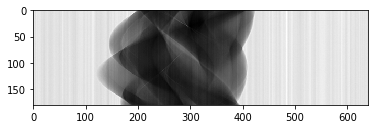

In [24]:
plt.imshow(proj[:, 0, :], cmap='Greys_r')
plt.show()

If the angular information is not avaialable from the raw data you need to set the data collection angles. In this case theta is set as equally spaced between 0-180 degrees.

In [25]:
theta = tomopy.angles(proj.shape[0])

Perform the flat-field correction of raw data: $$ \frac{proj - dark} {flat - dark} $$

In [26]:
proj = tomopy.normalize(proj, flat, dark)

Select the rotation center manually

In [27]:
rot_center = 296

Calculate $$ -log(proj) $$

In [28]:
proj = tomopy.minus_log(proj)
proj[proj<0] = 0

Reconstruction using FBP method with the log-polar coordinates
$$ \hat{f}=\mathcal{W}\mathcal{R}^* g $$

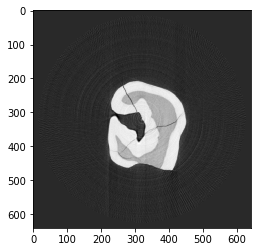

In [37]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm=tomopy.lprec, lpmethod='fbp', filter_name='parzen')
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :,:], cmap='Greys_r')
plt.show()

Reconstruction using the gradient descent method with the log-polar coordinates
$$ \hat{f} = \text{argmin}_f\lVert\mathcal{R}f-g \rVert_2^2 $$

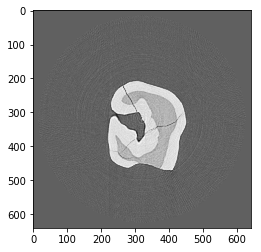

In [31]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm=tomopy.lprec, lpmethod='grad', ncore=1, num_iter=64, reg_par=-1)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :,:], cmap='Greys_r')
plt.show()

Reconstruction using the conjugate gradient method with the log-polar coordinates
$$ \hat{f} = \text{argmin}_f\lVert\mathcal{R}f-g \rVert_2^2 $$

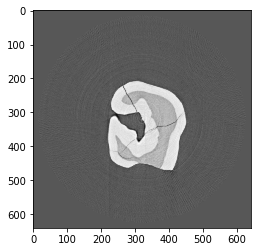

In [32]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm=tomopy.lprec, lpmethod='cg', ncore=1, num_iter=16, reg_par=-1)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :,:], cmap='Greys_r')
plt.show()

Reconstruction using the TV method with the log-polar coordinates. It gives piecewise constant reconstructions and can be used for denoising.
$$ \hat{f} = \text{argmin}_f\lVert\mathcal{R}f-g \rVert_2^2 + \lambda \lVert\nabla f\rVert_1 $$

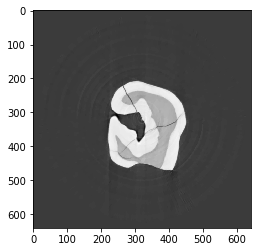

In [33]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm=tomopy.lprec, lpmethod='tv', ncore=1, num_iter=512, reg_par=5e-4)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :,:], cmap='Greys_r')
plt.show()

Reconstruction using the TV-entropy method with the log-polar coordinates. It can be used for suppressing Poisson noise.
$$ \hat{f} = \text{argmin}_f \lambda \lVert\nabla f\rVert_1+\int_\Omega\mathcal{R}f-g\log(\mathcal{R}f)df $$

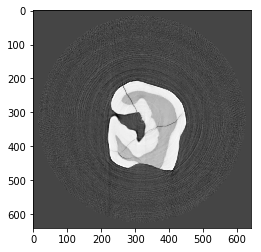

In [34]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm=tomopy.lprec, lpmethod='tve', ncore=1, num_iter=512, reg_par=2e-4)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :,:], cmap='Greys_r')
plt.show()

Reconstruction using the TV-l1 method with the log-polar coordinates. It can be used to remove
structures of an image of a certain scale, and the regularization parameter $\lambda$ can be used for scale selection. 
$$ \hat{f} = \text{argmin}_f\lVert\mathcal{R}f-g \rVert_1 + \lambda \lVert\nabla f\rVert_1 $$


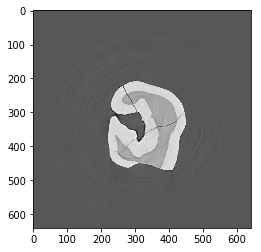

In [35]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm=tomopy.lprec, lpmethod='tvl1', ncore=1, num_iter=512, reg_par=3e-2)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :,:], cmap='Greys_r')
plt.show()

Reconstruction using the MLEM method with the log-polar coordinates

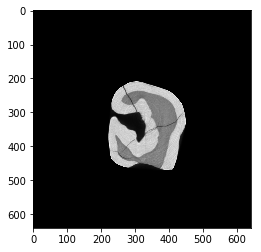

In [36]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm=tomopy.lprec, lpmethod='em', ncore=1, num_iter=64, reg_par=0.05)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :,:], cmap='Greys_r')
plt.show()